In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [3]:
from sklearn.datasets import load_breast_cancer  

In [4]:
df=pd.DataFrame(data=data['data'], columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y=data.target
X=df

In [6]:
data.target_names
#1 for malignant, 0 for benign

array(['malignant', 'benign'], dtype='<U9')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.25, random_state=0)

In [8]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
logistic_pred = classifier.predict(X_test)
from sklearn import metrics
logistic = metrics.accuracy_score(y_test, logistic_pred)
logistic

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.958041958041958

# RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators= 200, criterion='entropy') # gini/entropy
classifier2.fit(X_train, y_train)
RF_pred = classifier2.predict(X_test)
RF = metrics.accuracy_score(y_test, RF_pred)
RF

0.972027972027972

# DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion='gini', random_state=0)   #entropy/gini
classifier3.fit(X_train, y_train)
DT_pred = classifier.predict(X_test)
DT = metrics.accuracy_score(y_test, DT_pred)
DT

0.958041958041958

# SVC

In [13]:
from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf', random_state=0)  #kernal= linear/poly/rbf/sigmoid/precomputed
classifier4.fit(X_train, y_train)
svc_pred = classifier2.predict(X_test)
SVC = metrics.accuracy_score(y_test, svc_pred)
SVC

0.972027972027972

# KNeighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
KNN = metrics.accuracy_score(y_test, knc_pred)
KNN

0.951048951048951

# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
nbc_pred = nbc.predict(X_test)
NaiveBias = metrics.accuracy_score(y_test, nbc_pred)
NaiveBias

0.9370629370629371

In [16]:
metric = ['logistic', 'RF', 'DT', 'SVC', 'KNN', 'NaiveBias']
metric_data = (logistic, RF, DT, SVC, KNN, NaiveBias)
pd.DataFrame(data=metric_data, index=metric, columns=['%efficiency'])

,%efficiency
logistic,0.958042
RF,0.972028
DT,0.958042
SVC,0.972028
KNN,0.951049
NaiveBias,0.937063


In [17]:
df['taget']=data.target

<IPython.core.display.Javascript object>


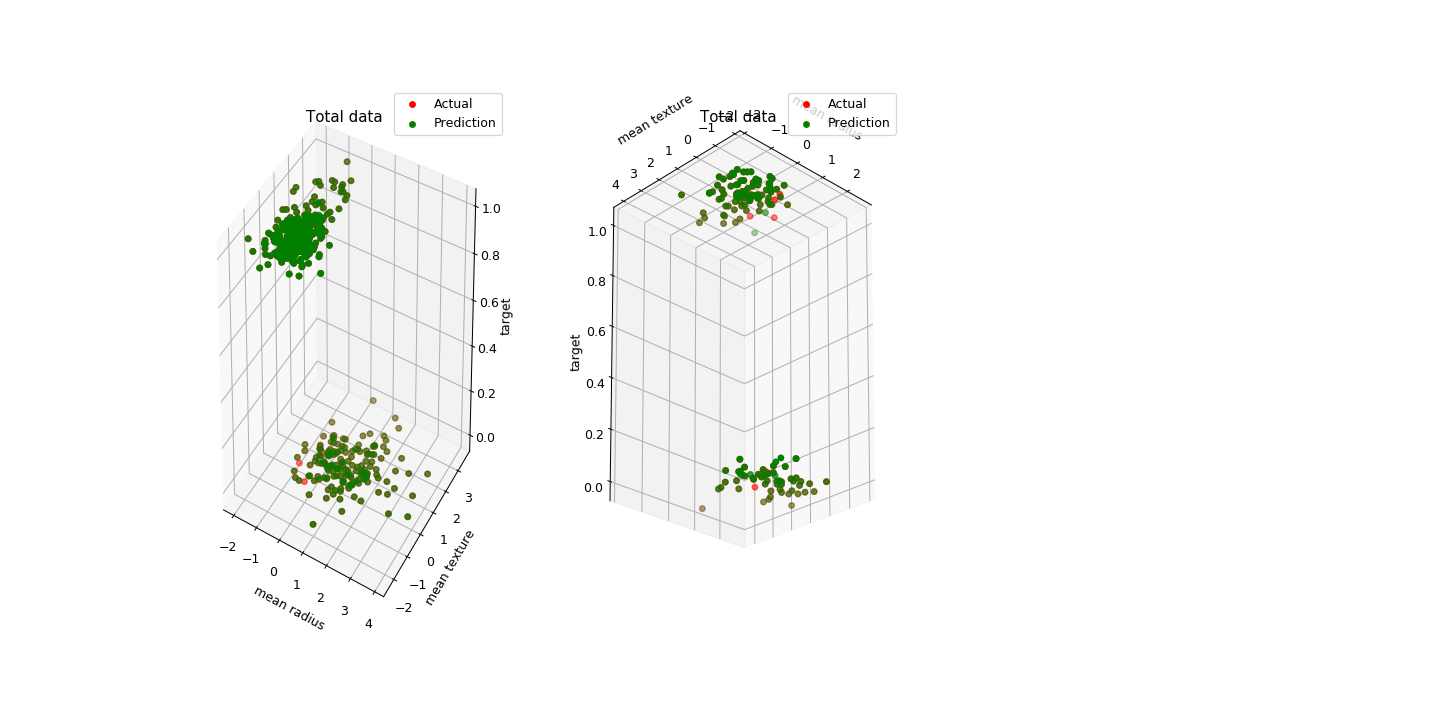

In [22]:
# Visualize results
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig=plt.figure(figsize=(16,8))
ax0 = fig.add_subplot(131, projection='3d')
ax1 = fig.add_subplot(132, projection='3d')

#train data
ax0.scatter(X_train[:,0], X_train[:,1], y_train, color='r', label='Actual')
ax0.scatter(X_train[:,0], X_train[:,1], classifier.predict(X_train), color='g', label='Prediction')
ax0.set_xlabel('mean radius')
ax0.set_ylabel('mean texture')
ax0.set_zlabel('target')
ax0.set_title('Total data')
ax0.legend()
#test data
ax1.scatter(X_test[:,0], X_test[:,1], y_test, color='r', label='Actual')
ax1.scatter(X_test[:,0], X_test[:,1], classifier.predict(X_test), color='g', label='Prediction')
ax1.set_xlabel('mean radius')
ax1.set_ylabel('mean texture')
ax1.set_zlabel('target')
ax1.set_title('Total data')
ax1.legend()